# PANW Mixture Modeling

#### Example 1: PANW Mixture Modeling Application

[*********************100%%**********************]  1 of 1 completed


sample mean: $175.56467342214242
sample standard deviation: $78.6388706608656


<Figure size 1000x600 with 0 Axes>

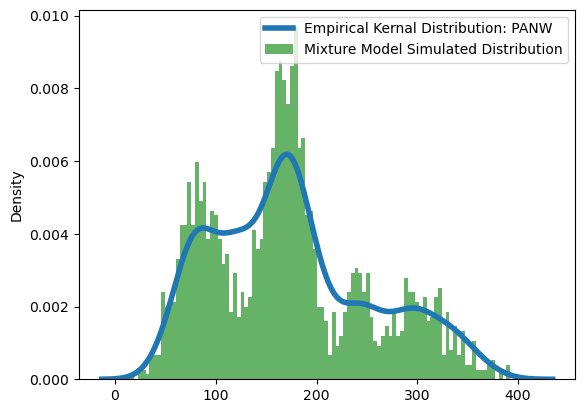

In [33]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import yfinance as yf

start_date = datetime(2020,1,1)
end_date = datetime(2024,8,31)

stock_symbol = "PANW"
stocks = yf.download(stock_symbol,start_date ,end_date)
stocks['Adj Close'].describe() # summary statistics
X = stocks['Adj Close'].values
mu = np.mean(X)
se = np.std(X)
print(f"sample mean: ${mu}")
print(f"sample standard deviation: ${se}")

# Given parameters
mu_1 = 85
sigma1 = 22
mu_2 = 170
sigma2 = 20
mu_3 = 240
sigma3 = 10
mu_4 = 300
sigma4 = 35
p1 = 0.30
p2 = 0.45
p3 = 0.08
p4 = 1 - (p1 + p2 + p3)

T = 2000

# Generate the data for r
r = np.zeros(T)
for t in range(T):
    r1 = mu_1 + sigma1 * np.random.normal(0,1,1)
    r2 = mu_2 + sigma2 * np.random.normal(0,1,1)
    r3 = mu_3 + sigma3 * np.random.normal(0,1,1)
    r4 = mu_4 + sigma4 * np.random.normal(0,1,1)
    u = np.random.uniform(0,1,1)
    r[t] = r1 * (u <= p1)+ r2 * (u > p1)*(u <= p1 + p2) \
        + r3 * (u > p1 + p2 )*(u <= p1 + p2 + p3) \
        + r4 * (u > p1 + p2 + p3 )*(u <= p1 + p2 + p3 + p4)

# Plotting the histogram of r
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
sns.kdeplot(data=X, linewidth=4)
plt.hist(r, bins=100, density=True, alpha=0.6, color='green', label="Histogram")
ax.legend([f'Empirical Kernal Distribution: {stock_symbol}', 'Mixture Model Simulated Distribution'])

#### Example 2: PANW Monte Carlo Mixture Distruibution Simulation

[*********************100%%**********************]  1 of 1 completed


sample mean: $175.56467342214242
sample standard deviation: $78.6388706608656
confidence interval of mu_mc: 167.74957471740444 176.34795524393763


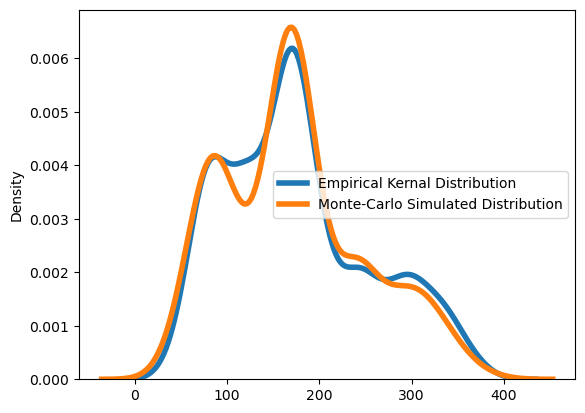

In [30]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import yfinance as yf

start_date = datetime(2020,1,1)
end_date = datetime(2024,8,31)

stock_symbol = "PANW"
stocks = yf.download(stock_symbol,start_date ,end_date)
stocks['Adj Close'].describe() # summary statistics
X = stocks['Adj Close'].values
T = len(X) # number of trading days
mu = np.mean(X)
se = np.std(X)
print(f"sample mean: ${mu}")
print(f"sample standard deviation: ${se}")

# observe kde plot and assign values to key parameters
# Given parameters
mu_1 = 85
sigma1 = 22
mu_2 = 170
sigma2 = 20
mu_3 = 240
sigma3 = 10
mu_4 = 300
sigma4 = 35
p1 = 0.30
p2 = 0.45
p3 = 0.08
p4 = 1 - (p1 + p2 + p3)


def generateEmpiricalDist(mu_1, sigma1,\
                          mu_2, sigma2,\
                          mu_3, sigma3,\
                          mu_4, sigma4,\
                          p1, p2, p3, p4, T):
    #Normal Mixture
    simulatedPrice = np.zeros(T-1);
    for t in range(0,T-1):
        r1 = mu_1 + sigma1 * np.random.normal(0,1,1)
        r2 = mu_2 + sigma2 * np.random.normal(0,1,1)
        r3 = mu_3 + sigma3 * np.random.normal(0,1,1)
        r4 = mu_4 + sigma4 * np.random.normal(0,1,1)
        u = np.random.uniform(0,1,1)
        simulatedPrice[t] = r1 * (u <= p1)+ r2 * (u > p1)*(u <= p1 + p2) \
        + r3 * (u > p1 + p2 )*(u <= p1 + p2 + p3) \
        + r4 * (u > p1 + p2 + p3 )*(u <= p1 + p2 + p3 + p4)
        
    return simulatedPrice


T = X.shape[0]
M = 1000
mu_mc = np.zeros(M)
y_mc = 0
for i in range(0, M):
    simulatedPrice = generateEmpiricalDist(mu_1, sigma1,\
                                           mu_2, sigma2,\
                                           mu_3, sigma3,\
                                           mu_4, sigma4,\
                                           p1, p2, p3, p4, T)
    mu_mc[i] = np.mean(simulatedPrice)
    y_mc += np.sort(simulatedPrice)

y_mc = y_mc/M
mu_mc = np.sort(mu_mc)

print("confidence interval of mu_mc:", mu_mc[25], mu_mc[975])

# Visualization
fig, ax = plt.subplots()
sns.kdeplot(data=X, linewidth=4) # the blue line
sns.kdeplot(data=y_mc, linewidth=4) # the orange line
ax.legend(['Empirical Kernal Distribution', 'Monte-Carlo Simulated Distribution'])